In [1]:
#import os
#os.chdir("/work/aa0238/a271093/Scripts/MOAAP")
#!pwd

In [1]:
%load_ext autoreload
%autoreload 2
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import datetime
import cartopy
from metpy.units import units
import cartopy.crs as ccrs
import pickle
import os

from src.utils import * 
from src.Corrections import * 
from src.Enumerations import Month, Season, Experiments, Domains
from src.xarray_util import create_obj_from_dict,  ObjectContainer,  load_tracking_objects
from src.plot_funcs import plot_on_rotated_grid, plot_contourf_rotated_grid


/work/aa0238/a271093/Conda/MOAAP_env/lib/python3.12/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()
/work/aa0238/a271093/Scripts/MOAAP/src/xarray_util.py:22: AccessorRegistrationWarning: registration of accessor <class 'src.xarray_util.Accessor'> under name 'get' for type <class 'xarray.core.dataset.Dataset'> is overriding a preexisting attribute with the same name.
  @xr.register_dataset_accessor("get")


## Settings

In [3]:
exp_ICON_ERA5=Experiments.ICON_ERA5.value
exp_ERA5=Experiments.ERA5.value

input_path_ICON_ERA5= exp_ICON_ERA5.path_IVT_tracking
input_path_ERA5= exp_ERA5.path_IVT_tracking


type_='IVT'
input_file_name_temp_ERA5 = 'MOAPP_ERA5_100and85controlperc_remapped_3x'
input_file_name_temp_ICON_ERA5 = 'MOAPP_ICON_ERA5_100and85ERA5perc_remapped_3x'

first_year = 1979
last_year = 2022
num_years = last_year-first_year

## Load pickle dictionaries into in-memory Datasets

In [ ]:
IVT_objs_ERA5 = load_tracking_objects(input_path_ERA5,
                                      input_file_name_temp_ERA5,
                                      type_,
                                      first_year,
                                      last_year,
                                      load_coordinates=True,
                                      compute_hist = False,
                                      #compute_hist = False,
                                      exp=exp_ERA5,
                                      var_names_ls = ["IVT","IWV"],
                                      var_paths_ls = ["/work/aa0238/a271093/data/ERA5/1979-2023/ICON_remapped_3x/IVT/",#,
                                                      "/work/aa0238/a271093/data/ERA5/1979-2023/ICON_remapped_3x/IWV/"],
                                      suffix="_NEW"
                                      
                                      )

/work/aa0238/a271093/results/MOAAP/IVT_Tracking/ERA5_ICON_remapped_3x/Object_container_1979-2022_NEW_IVT_IWV exists. Loading...


In [ ]:
fig = plt.figure(figsize=(30,20))
levels=np.arange(0,100,5)
tsteps=[0,12,24,48,72,96]
subplts = (4,len(tsteps))
plot_idx = np.arange(0,len(tsteps)*4,len(tsteps))
font_size = 17
domain = Domains.NORTH_ATLANTIC.value

for  season_,i in zip(Season,plot_idx):
    k=0

    print (season_)
    
        
    
        
    IVTobjs_sel_ERA5 = IVT_objs_ERA5.sel_season(season_).sel_by_domain(domain,type_="anytime", domain_frac = 0.1, select_last_timesteps=True)
    for j,t in enumerate(tsteps):

        IVTobjs_sel_tstep = IVTobjs_sel_ERA5.seltimesteps(time_slice=slice(t,t+1))
        number_objs =IVTobjs_sel_tstep.count()


        lon,lat,z = calculate_variable_sum(IVTobjs_sel_tstep, attr="IWV")
    
        # normalize grid point counts to counts per season
        z= (z/num_years)*1.000001
        z[z<0.5] = np.nan
        plot_on_rotated_grid(lon,
                                  lat, 
                                  z, 
                                  fig=fig,
                                  index = i+j ,
                                  levels = levels,
                                   subplts=subplts,
                                  title=f'ERA5 {season_.name}: {tsteps[k]} hours \n ({number_objs} Objects)',
                                  #cbar_label = "Total IWV [kg*m^-2] transported by objects \n after passing region (per season)",
                                  cbar_label = "Accumulated IWV  per season [kg*m^-2] \n due to objects ",

                                  plot_domains={domain : 'green'},
                                  cbar=True,
                             cmap="gist_ncar",
                                  font_size=font_size
                                    )

        k +=1
        
   
    
plt.tight_layout()

In [ ]:
fig = plt.figure(figsize=(30,20))
levels=np.arange(0,100,5)
tsteps=[0,12,24,48,72,96]
subplts = (4,len(tsteps))
plot_idx = np.arange(0,len(tsteps)*4,len(tsteps))
font_size = 17
domain = Domains.SIBERIA.value

for  season_,i in zip(Season,plot_idx):
    k=0

    print (season_)
    
        
    
        
    IVTobjs_sel_ERA5 = IVT_objs_ERA5.sel_season(season_).sel_by_domain(domain,type_="anytime", domain_frac = 0.1, select_last_timesteps=True)
    for j,t in enumerate(tsteps):

        IVTobjs_sel_tstep = IVTobjs_sel_ERA5.seltimesteps(time_slice=slice(t,t+1))
        number_objs =IVTobjs_sel_tstep.count()


        lon,lat,z = calculate_variable_sum(IVTobjs_sel_tstep, attr="IWV")
    
        # normalize grid point counts to counts per season
        z= (z/num_years)*1.000001
        z[z<0.5] = np.nan
        plot_on_rotated_grid(lon,
                                  lat, 
                                  z, 
                                  fig=fig,
                                  index = i+j ,
                                  levels = levels,
                                   subplts=subplts,
                                  title=f'ERA5 {season_.name}: {tsteps[k]} hours \n ({number_objs} Objects)',
                                  #cbar_label = "Total IWV [kg*m^-2] transported by objects \n after passing region (per season)",
                                  cbar_label = "Accumulated IWV  per season [kg*m^-2] \n due to objects ",

                                  plot_domains={domain : 'green'},
                                  cbar=True,
                             cmap="gist_ncar",
                                  font_size=font_size
                                    )

        k +=1
        
   
    
plt.tight_layout()

In [ ]:
fig = plt.figure(figsize=(30,20))
levels=np.arange(0,100,5)
tsteps=[0,12,24,48,72,96]
subplts = (4,len(tsteps))
plot_idx = np.arange(0,len(tsteps)*4,len(tsteps))
font_size = 17
domain = Domains.BERING_STRAIT.value

for  season_,i in zip(Season,plot_idx):
    k=0

    print (season_)
    
        
    
        
    IVTobjs_sel_ERA5 = IVT_objs_ERA5.sel_season(season_).sel_by_domain(domain,type_="anytime", domain_frac = 0.1, select_last_timesteps=True)
    for j,t in enumerate(tsteps):

        IVTobjs_sel_tstep = IVTobjs_sel_ERA5.seltimesteps(time_slice=slice(t,t+1))
        number_objs =IVTobjs_sel_tstep.count()


        lon,lat,z = calculate_variable_sum(IVTobjs_sel_tstep, attr="IWV")
    
        # normalize grid point counts to counts per season
        z= (z/num_years)*1.000001
        z[z<0.5] = np.nan
        plot_on_rotated_grid(lon,
                                  lat, 
                                  z, 
                                  fig=fig,
                                  index = i+j ,
                                  levels = levels,
                                   subplts=subplts,
                                  title=f'ERA5 {season_.name}: {tsteps[k]} hours \n ({number_objs} Objects)',
                                  #cbar_label = "Total IWV [kg*m^-2] transported by objects \n after passing region (per season)",
                                  cbar_label = "Accumulated IWV  per season [kg*m^-2] \n due to objects ",

                                  plot_domains={domain : 'green'},
                                  cbar=True,
                             cmap="gist_ncar",
                                  font_size=font_size
                                    )

        k +=1
        
   
    
plt.tight_layout()

In [ ]:
fig = plt.figure(figsize=(30,20))
levels=np.arange(0,100,5)
tsteps=[0,12,24,48,72,96]
subplts = (4,len(tsteps))
plot_idx = np.arange(0,len(tsteps)*4,len(tsteps))
font_size = 17
domain = Domains.NORTH_AMERICA.value

for  season_,i in zip(Season,plot_idx):
    k=0

    print (season_)
    
        
    
        
    IVTobjs_sel_ERA5 = IVT_objs_ERA5.sel_season(season_).sel_by_domain(domain,type_="anytime", domain_frac = 0.1, select_last_timesteps=True)
    for j,t in enumerate(tsteps):

        IVTobjs_sel_tstep = IVTobjs_sel_ERA5.seltimesteps(time_slice=slice(t,t+1))
        number_objs =IVTobjs_sel_tstep.count()


        lon,lat,z = calculate_variable_sum(IVTobjs_sel_tstep, attr="IWV")
    
        # normalize grid point counts to counts per season
        z= (z/num_years)*1.000001
        z[z<0.5] = np.nan
        plot_on_rotated_grid(lon,
                                  lat, 
                                  z, 
                                  fig=fig,
                                  index = i+j ,
                                  levels = levels,
                                   subplts=subplts,
                                  title=f'ERA5 {season_.name}: {tsteps[k]} hours \n ({number_objs} Objects)',
                                  #cbar_label = "Total IWV [kg*m^-2] transported by objects \n after passing region (per season)",
                                  cbar_label = "Accumulated IWV  per season [kg*m^-2] \n due to objects ",

                                  plot_domains={domain : 'green'},
                                  cbar=True,
                             cmap="gist_ncar",
                                  font_size=font_size
                                    )

        k +=1
        
   
    
plt.tight_layout()

In [ ]:
# Old

In [ ]:
fig = plt.figure(figsize=(30,20))
levels=np.arange(0,100,5)
tsteps=[0,12,24,48,72,96]
subplts = (4,len(tsteps))
plot_idx = np.arange(0,len(tsteps)*4,len(tsteps))
font_size = 17
domain = Domains.NORTH_AMERICA.value

for  season_,i in zip(Season,plot_idx):
    k=0

    print (season_)
    
        
    
        
    IVTobjs_sel_ERA5 = IVT_objs_ERA5.sel_season(season_).sel_by_domain(domain,type_="anytime", domain_frac = 0.1, select_last_timesteps=True)
    for j,t in enumerate(tsteps):

        IVTobjs_sel_tstep = IVTobjs_sel_ERA5.seltimesteps(time_slice=slice(t,t+1))
        number_objs =IVTobjs_sel_tstep.count()


        lon,lat,z = calculate_variable_sum(IVTobjs_sel_tstep, attr="IWV")
    
        # normalize grid point counts to counts per season
        z= (z/num_years)*1.000001
        z[z<0.5] = np.nan
        plot_on_rotated_grid(lon,
                                  lat, 
                                  z, 
                                  fig=fig,
                                  index = i+j ,
                                  levels = levels,
                                   subplts=subplts,
                                  title=f'ERA5 {season_.name}: {tsteps[k]} hours \n ({number_objs} Objects)',
                                  #cbar_label = "Total IWV [kg*m^-2] transported by objects \n after passing region (per season)",
                                  cbar_label = "Accumulated IWV  per season [kg*m^-2] \n due to objects ",

                                  plot_domains={domain : 'green'},
                                  cbar=True,
                             cmap="gist_ncar",
                                  font_size=font_size
                                    )

        k +=1
        
   
    
plt.tight_layout()

/work/aa0238/a271093/results/MOAAP/IVT_Tracking/ERA5_ICON_remapped_3x/Object_container_1979-2022_NEW_IVT_IWV exists. Loading...


Season.DJF
Season.MAM
Season.JJA
Season.SON


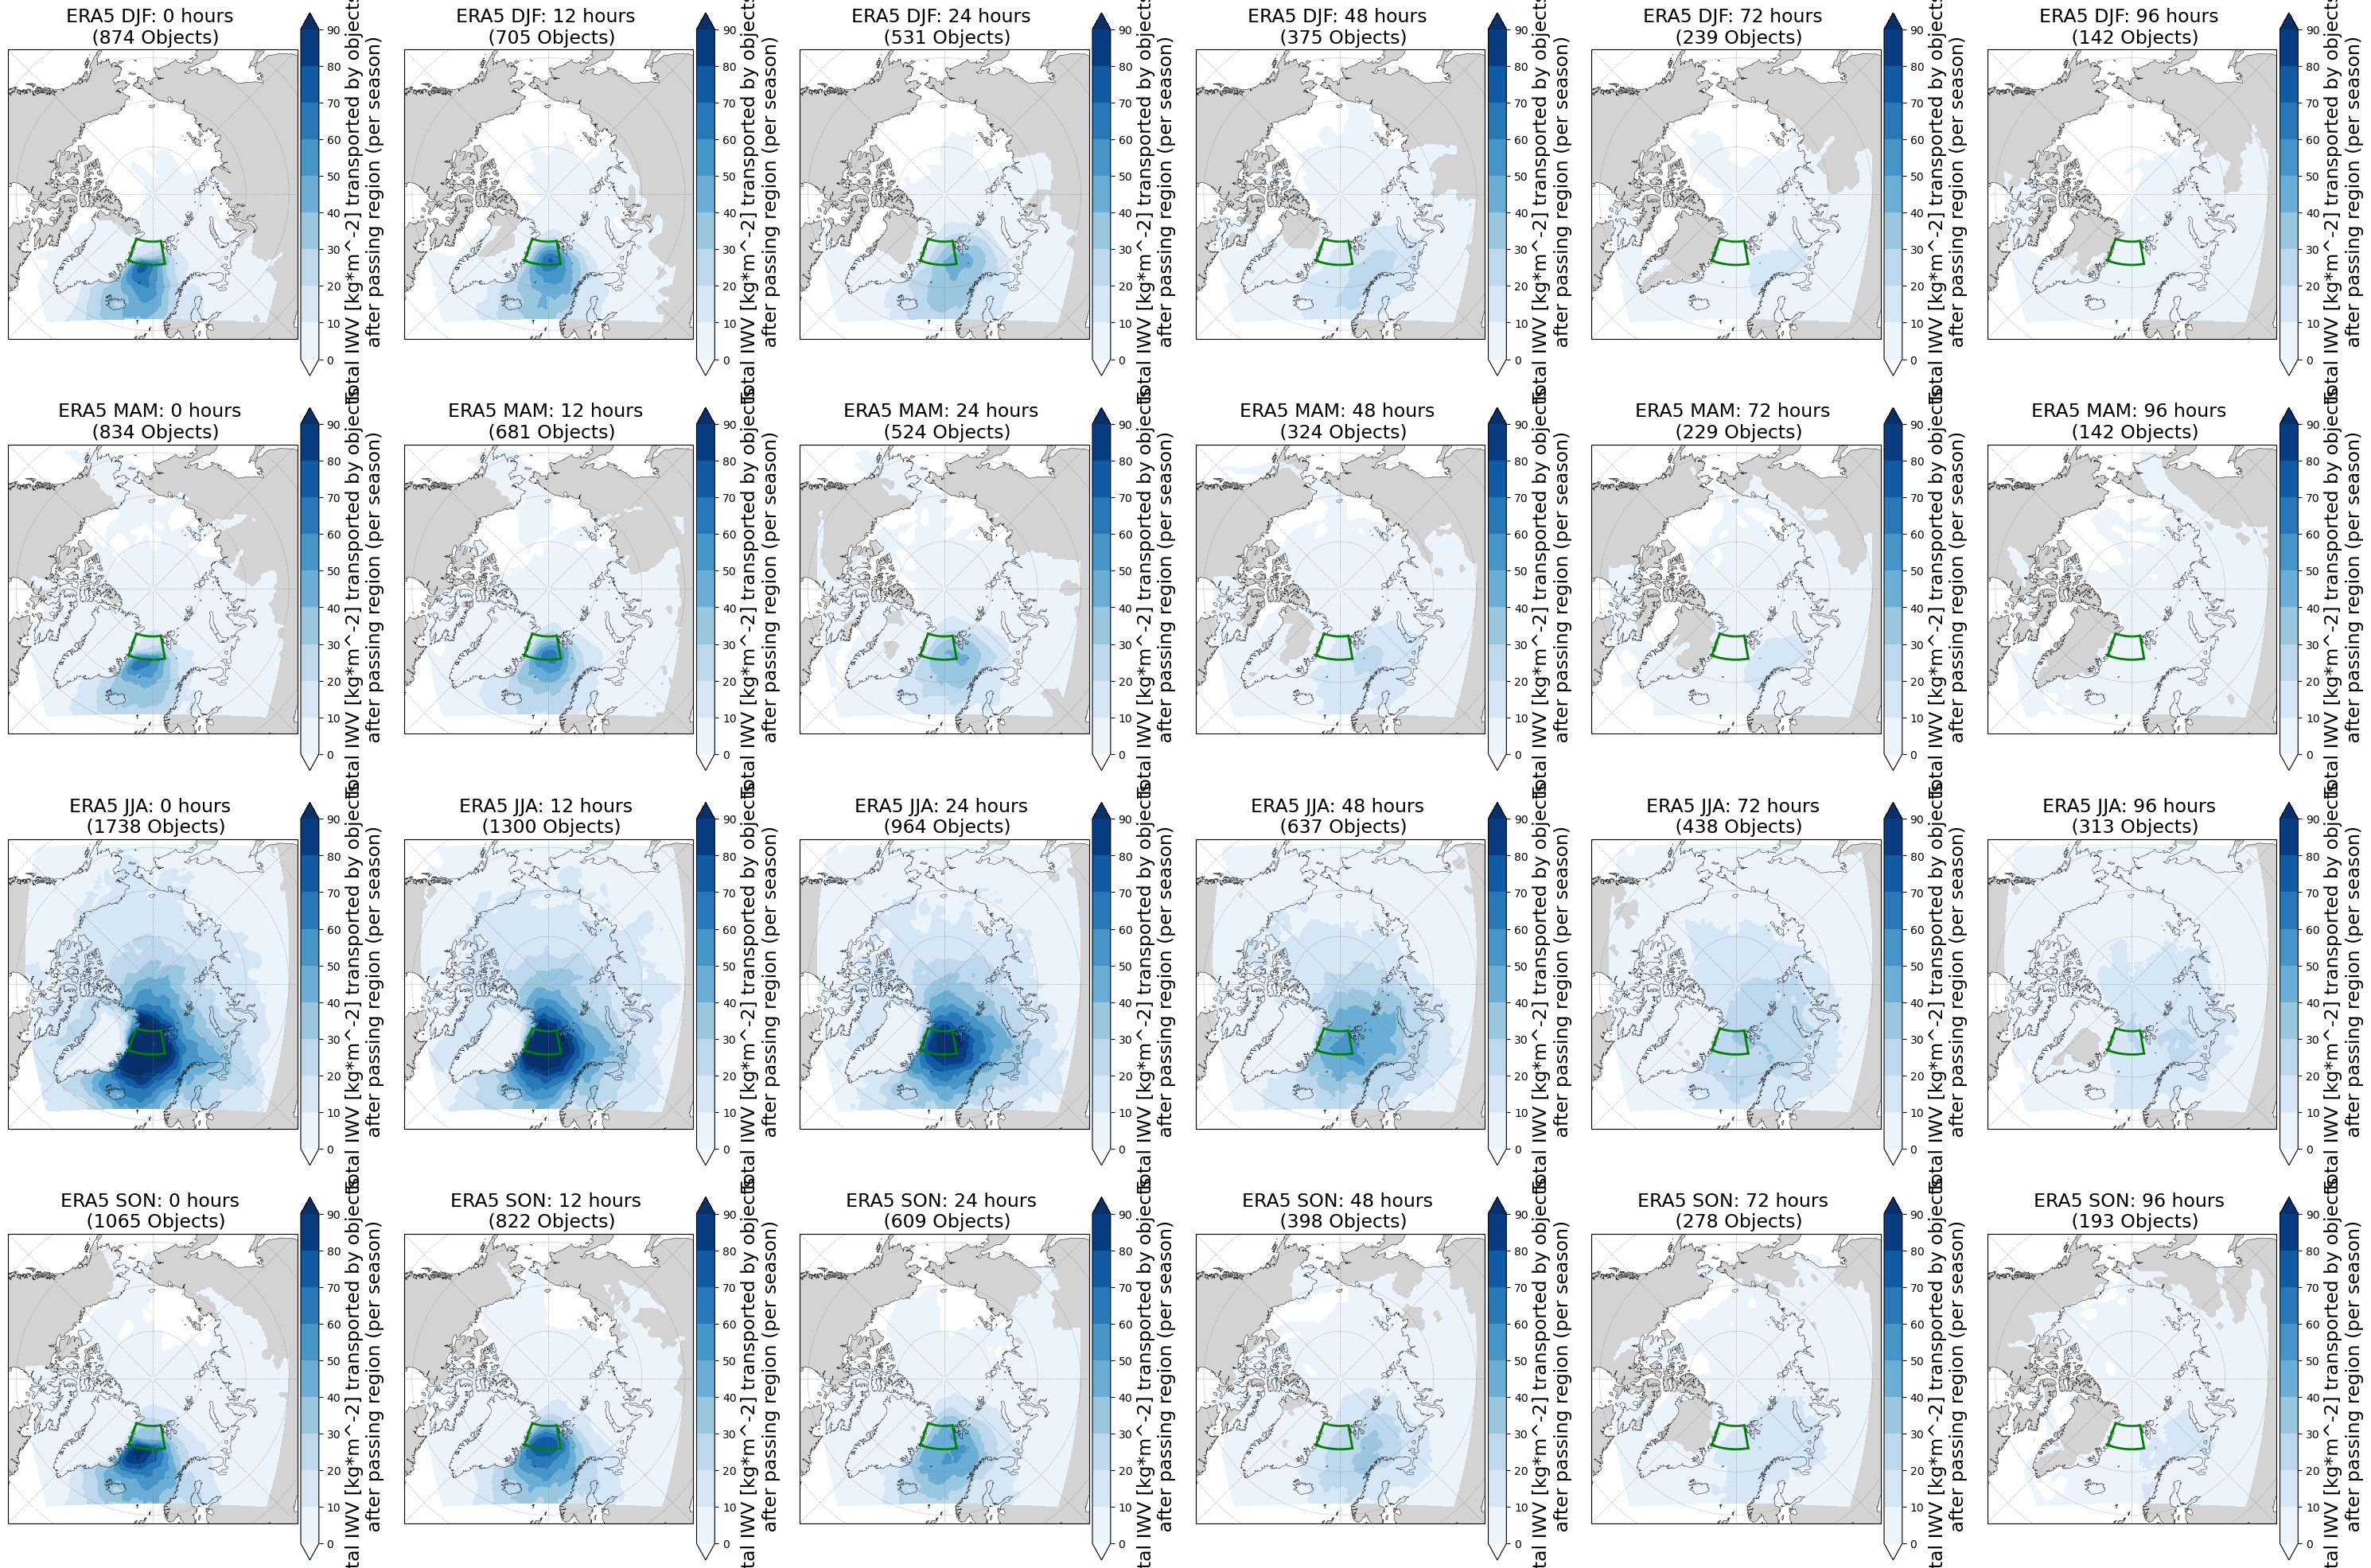

In [7]:
fig = plt.figure(figsize=(30,20))
levels=np.arange(0,100,10)
tsteps=[0,12,24,48,72,96]
subplts = (4,len(tsteps))
plot_idx = np.arange(0,len(tsteps)*4,len(tsteps))
font_size = 17

for  season_,i in zip(Season,plot_idx):
    k=0

    print (season_)
    
        
    
        
    IVTobjs_sel_ERA5 = IVT_objs_ERA5.sel_season(season_).sel_by_domain(Domains.GREENLAND_SEA.value,type_="anytime", domain_frac = 0.1, select_last_timesteps=True)
    for j,t in enumerate(tsteps):

        IVTobjs_sel_tstep = IVTobjs_sel_ERA5.seltimesteps(time_slice=slice(t,t+1))
        number_objs =IVTobjs_sel_tstep.count()


        lon,lat,z = calculate_variable_sum(IVTobjs_sel_tstep, attr="IWV")
    
        # normalize grid point counts to counts per season
        z= (z/num_years)*1.000001
        z[z<0.05]=np.nan
    
        plot_on_rotated_grid(lon,
                                  lat, 
                                  z, 
                                  fig=fig,
                                  index = i+j ,
                                  levels = levels,
                                   subplts=subplts,
                                  title=f'ERA5 {season_.name}: {tsteps[k]} hours \n ({number_objs} Objects)',
                                  cbar_label = "Total IWV [kg*m^-2] transported by objects \n after passing region (per season)",
                                  plot_domains={Domains.GREENLAND_SEA.value : 'green'},
                                  cbar=True,
                                  font_size=font_size
                                    )

        k +=1
        
   
    
plt.tight_layout()

Season.DJF
Season.MAM
Season.JJA
Season.SON


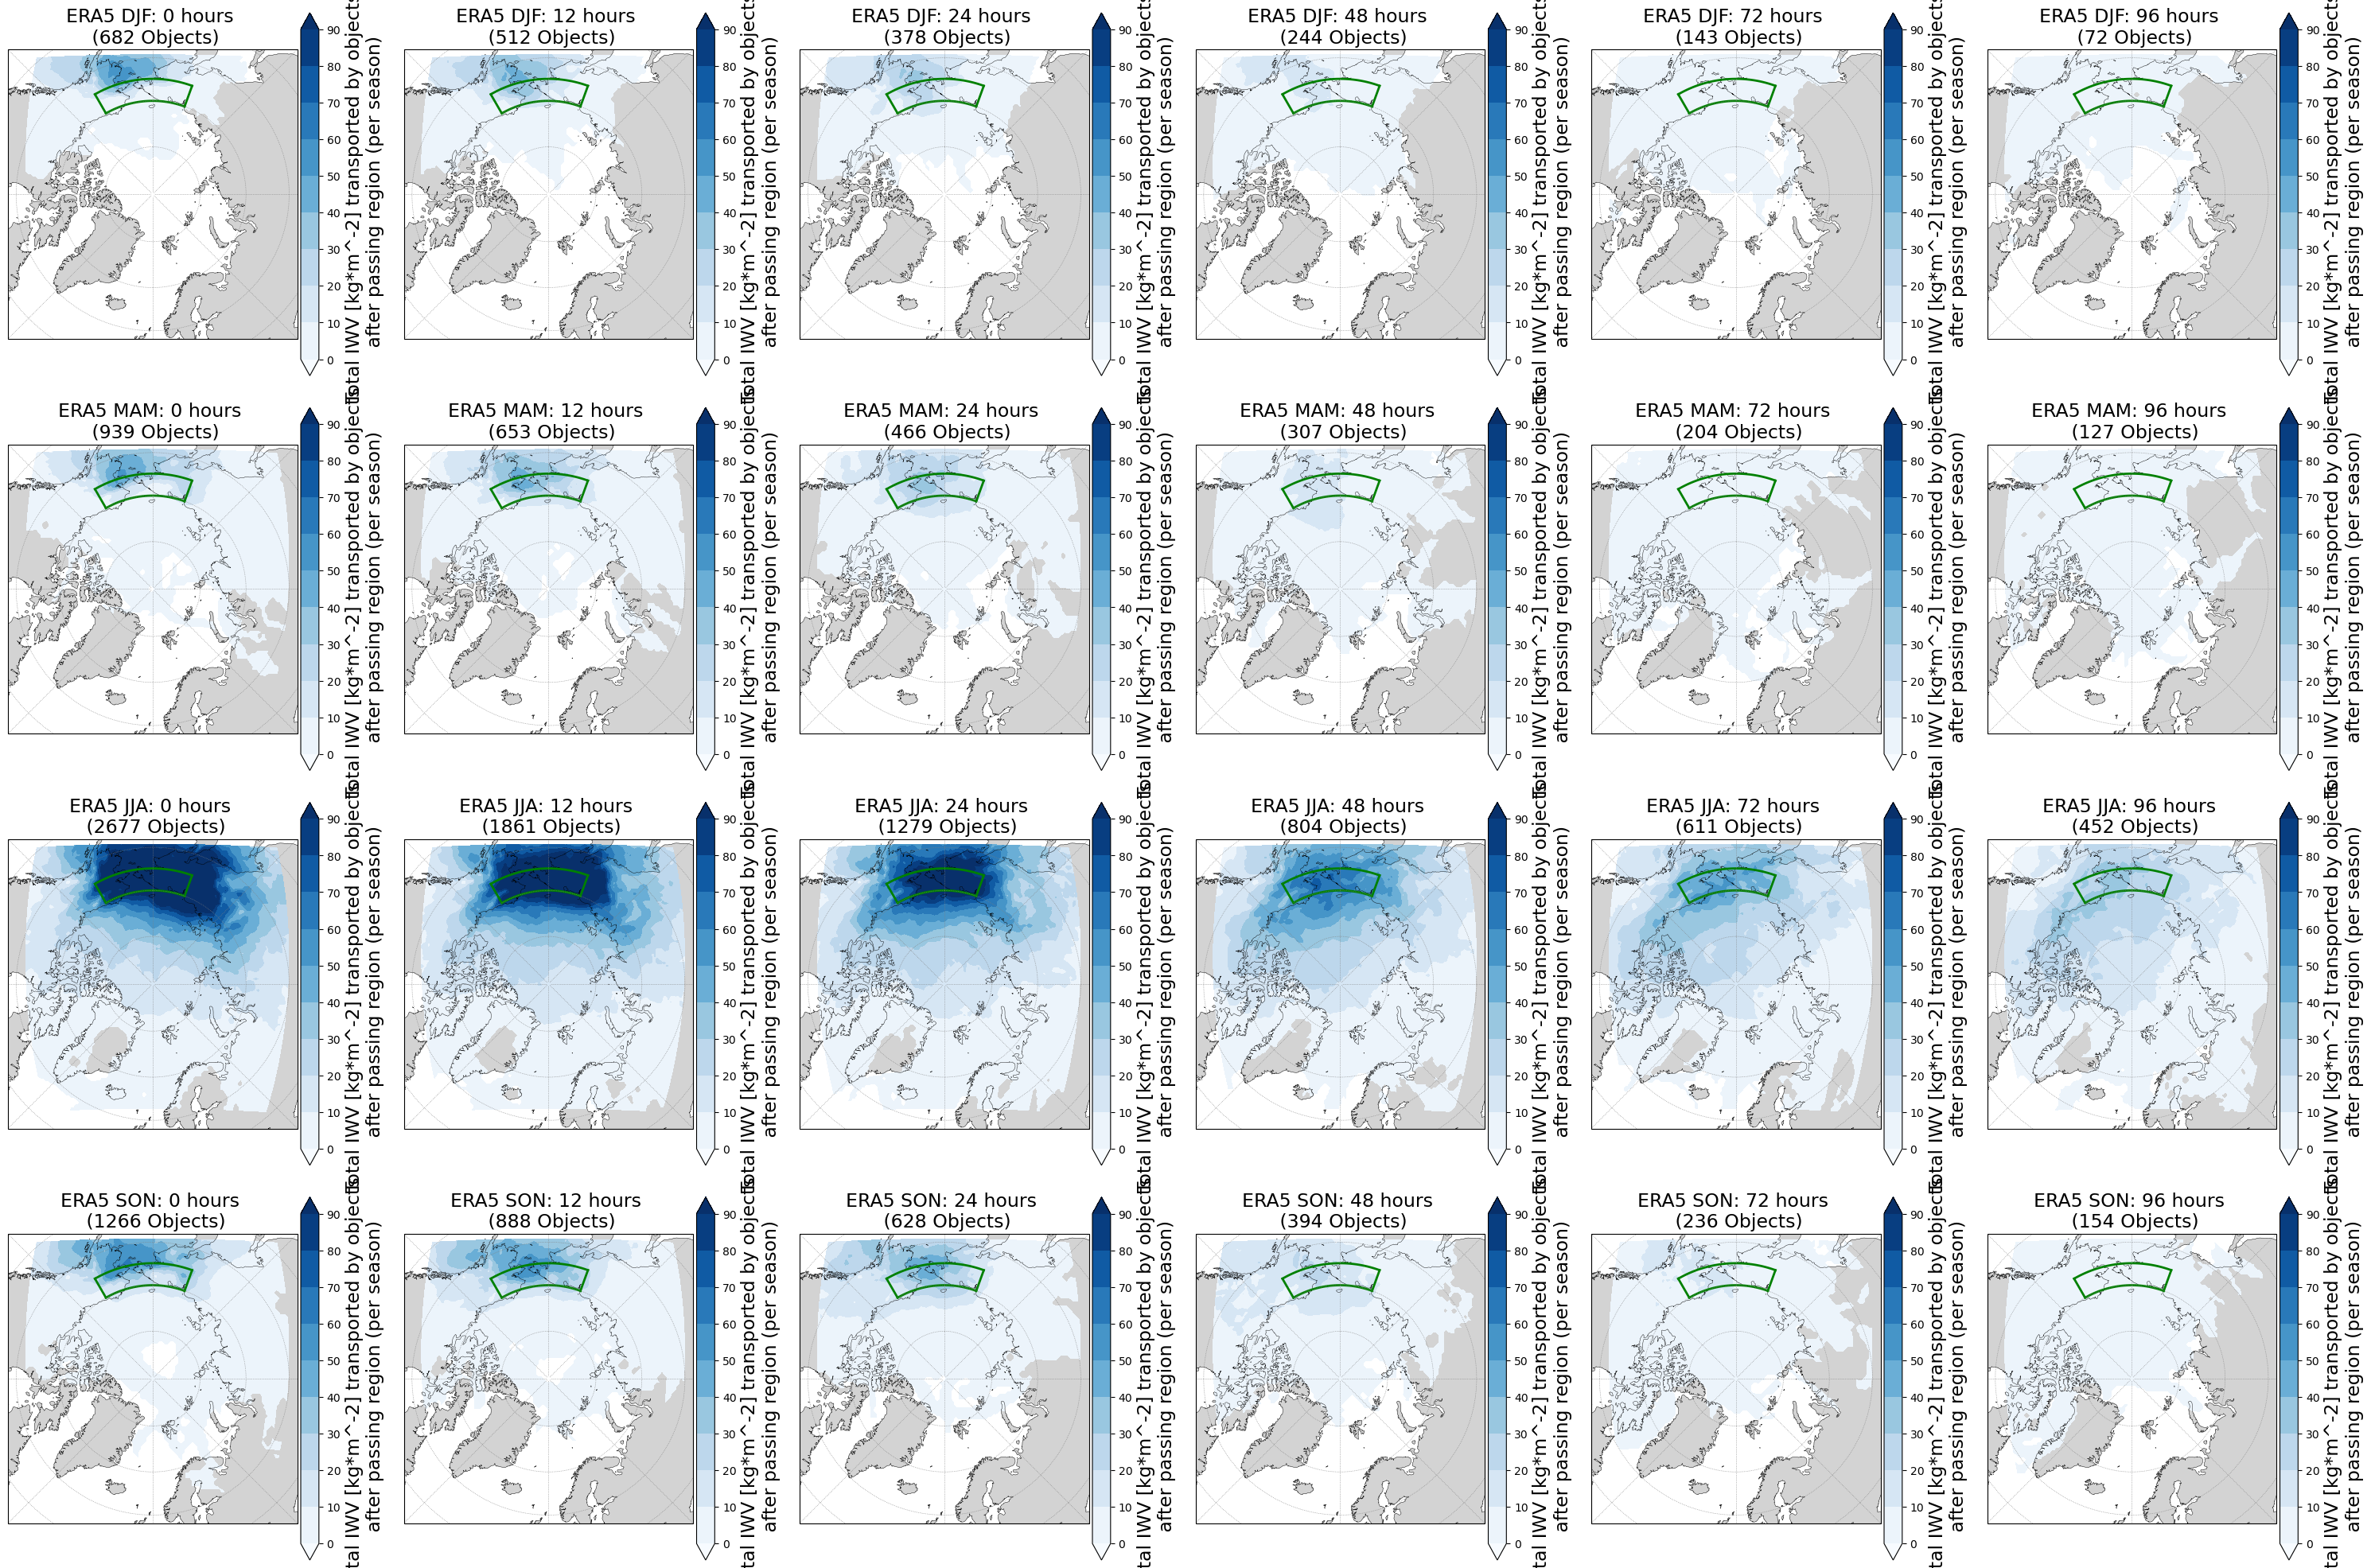

In [8]:
fig = plt.figure(figsize=(30,20))
levels=np.arange(0,100,10)
tsteps=[0,12,24,48,72,96]
subplts = (4,len(tsteps))
plot_idx = np.arange(0,len(tsteps)*4,len(tsteps))
font_size = 17
domain = Domains.BERING_STRAIT.value

for  season_,i in zip(Season,plot_idx):
    k=0

    print (season_)
    
        
    
        
    IVTobjs_sel_ERA5 = IVT_objs_ERA5.sel_season(season_).sel_by_domain(domain,type_="anytime", domain_frac = 0.1, select_last_timesteps=True)
    for j,t in enumerate(tsteps):

        IVTobjs_sel_tstep = IVTobjs_sel_ERA5.seltimesteps(time_slice=slice(t,t+1))
        number_objs =IVTobjs_sel_tstep.count()


        lon,lat,z = calculate_variable_sum(IVTobjs_sel_tstep, attr="IWV")
    
        # normalize grid point counts to counts per season
        z= (z/num_years)*1.000001
        z[z==0] = np.nan
        plot_on_rotated_grid(lon,
                                  lat, 
                                  z, 
                                  fig=fig,
                                  index = i+j ,
                                  levels = levels,
                                   subplts=subplts,
                                  title=f'ERA5 {season_.name}: {tsteps[k]} hours \n ({number_objs} Objects)',
                                  cbar_label = "Total IWV [kg*m^-2] transported by objects \n after passing region (per season)",
                                  plot_domains={domain : 'green'},
                                  cbar=True,
                                  font_size=font_size
                                    )

        k +=1
        
   
    
plt.tight_layout()

Season.DJF


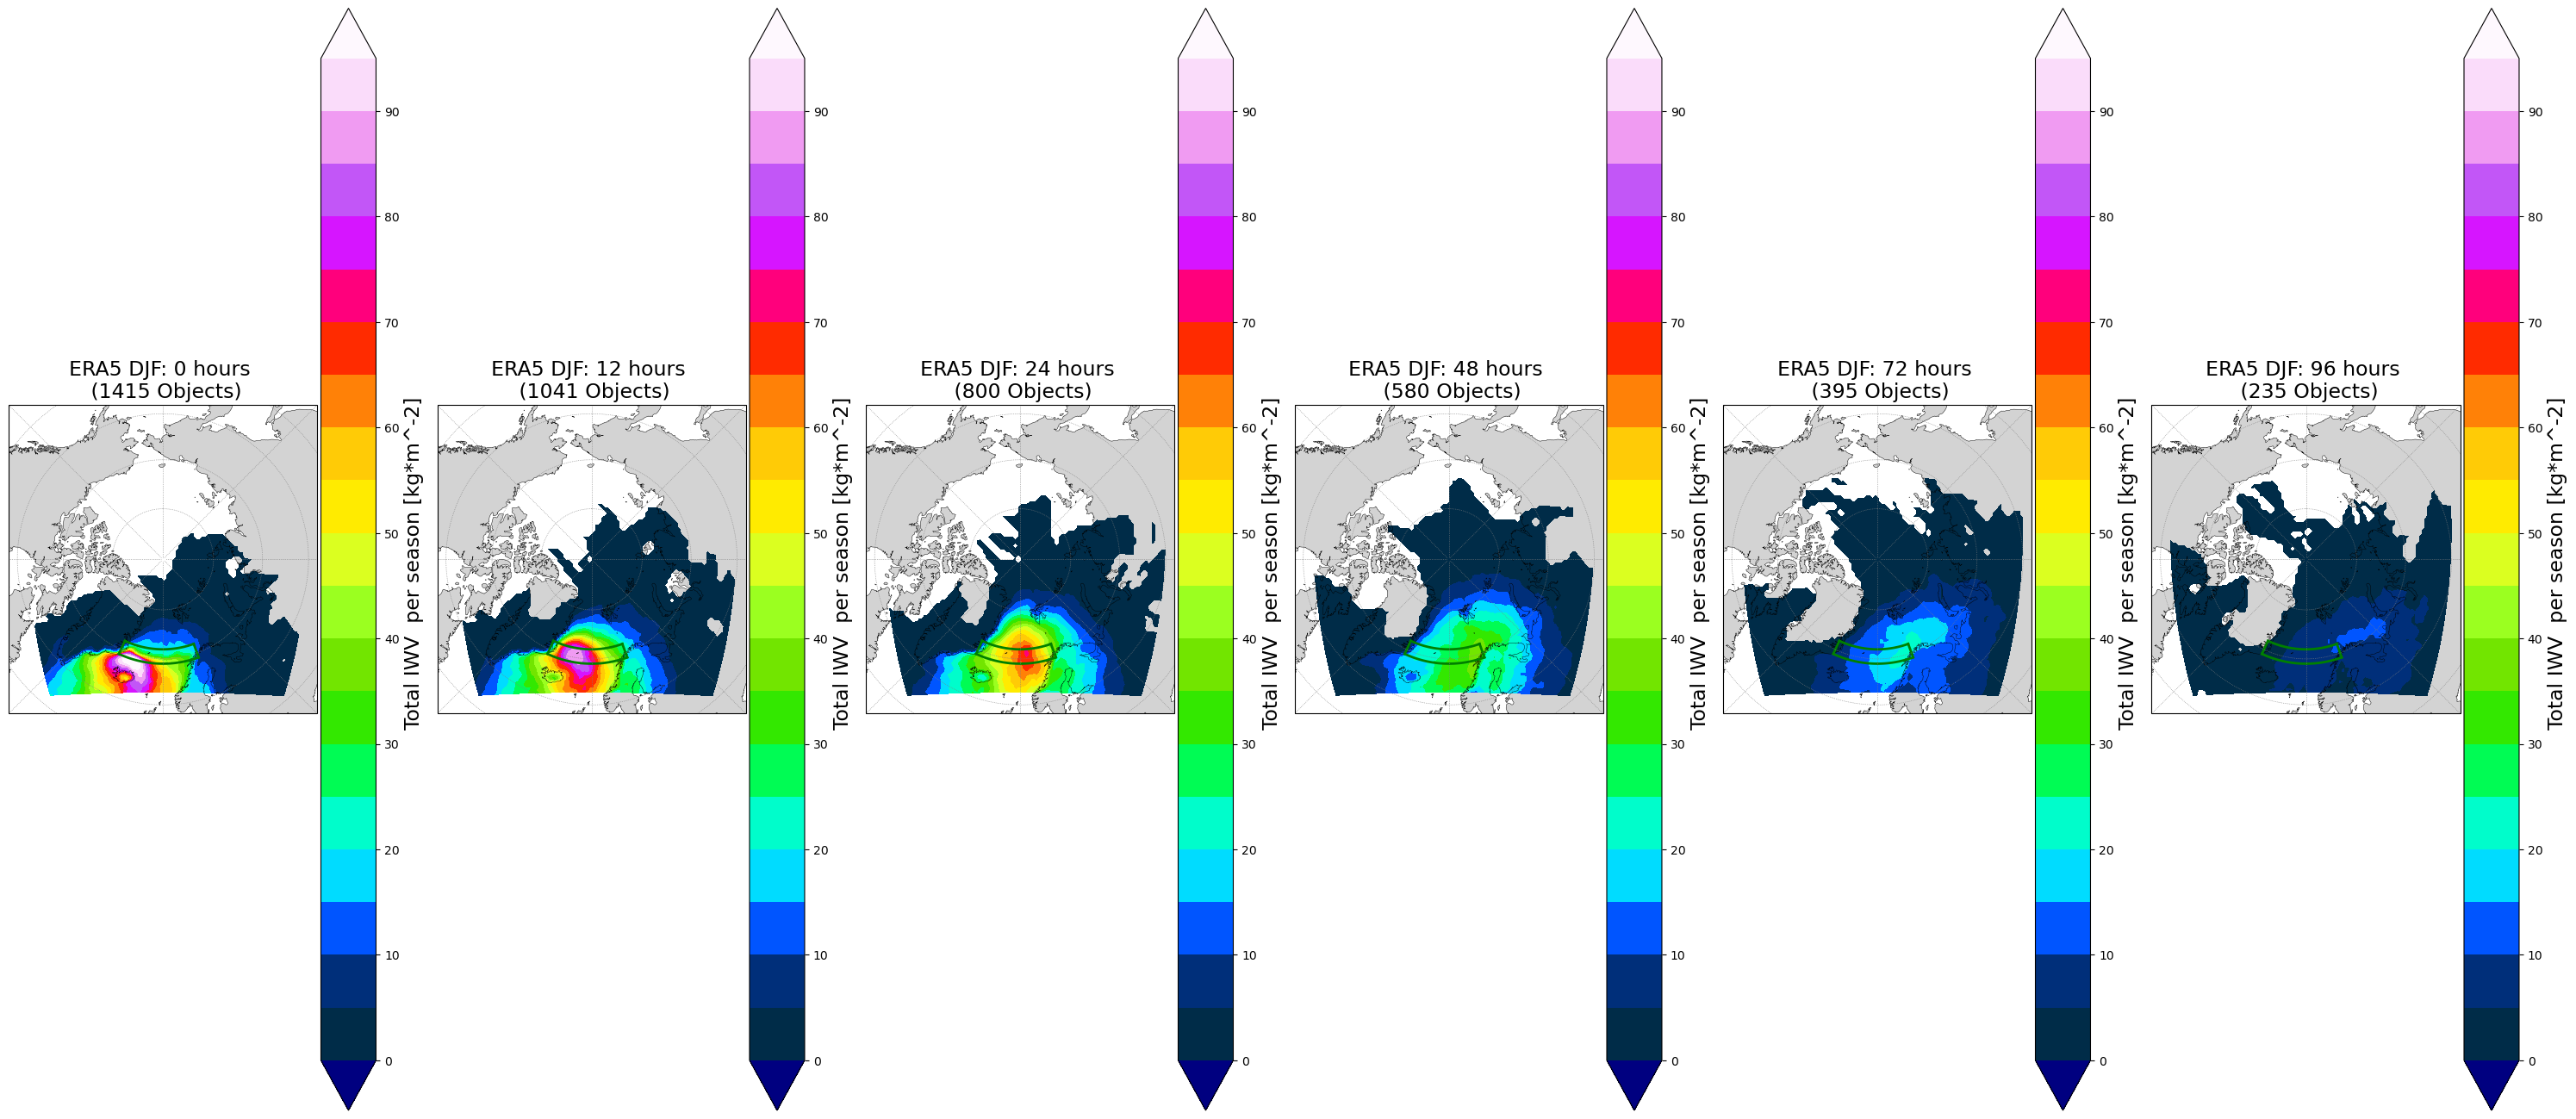

In [9]:
fig = plt.figure(figsize=(30,20))
levels=np.arange(0,100,5)
tsteps=[0,12,24,48,72,96]
subplts = (1,len(tsteps))
plot_idx = np.arange(0,len(tsteps)*1,len(tsteps))
font_size = 17
domain = Domains.ARCTIC_ENTRANCE_NA.value

for  season_,i in zip([Season.DJF],plot_idx):
    k=0

    print (season_)
    
        
    
        
    IVTobjs_sel_ERA5 = IVT_objs_ERA5.sel_season(season_).sel_by_domain(domain,type_="anytime", domain_frac = 0.1, select_last_timesteps=True)
    for j,t in enumerate(tsteps):

        IVTobjs_sel_tstep = IVTobjs_sel_ERA5.seltimesteps(time_slice=slice(t,t+1))
        number_objs =IVTobjs_sel_tstep.count()


        lon,lat,z = calculate_variable_sum(IVTobjs_sel_tstep, attr="IWV")
    
        # normalize grid point counts to counts per season
        z= (z/num_years)*1.000001
        z[z<0.5] = np.nan
        plot_on_rotated_grid(lon,
                                  lat, 
                                  z, 
                                  fig=fig,
                                  index = i+j ,
                                  levels = levels,
                                   subplts=subplts,
                                  title=f'ERA5 {season_.name}: {tsteps[k]} hours \n ({number_objs} Objects)',
                                  #cbar_label = "Total IWV [kg*m^-2] transported by objects \n after passing region (per season)",
                                  cbar_label = "Accumulated IWV  per season [kg*m^-2] \n due to objects",

                                  plot_domains={domain : 'green'},
                                  cbar=True,
                             cmap="gist_ncar",
                                  font_size=font_size
                                    )

        k +=1
        
   
    
plt.tight_layout()

Season.DJF


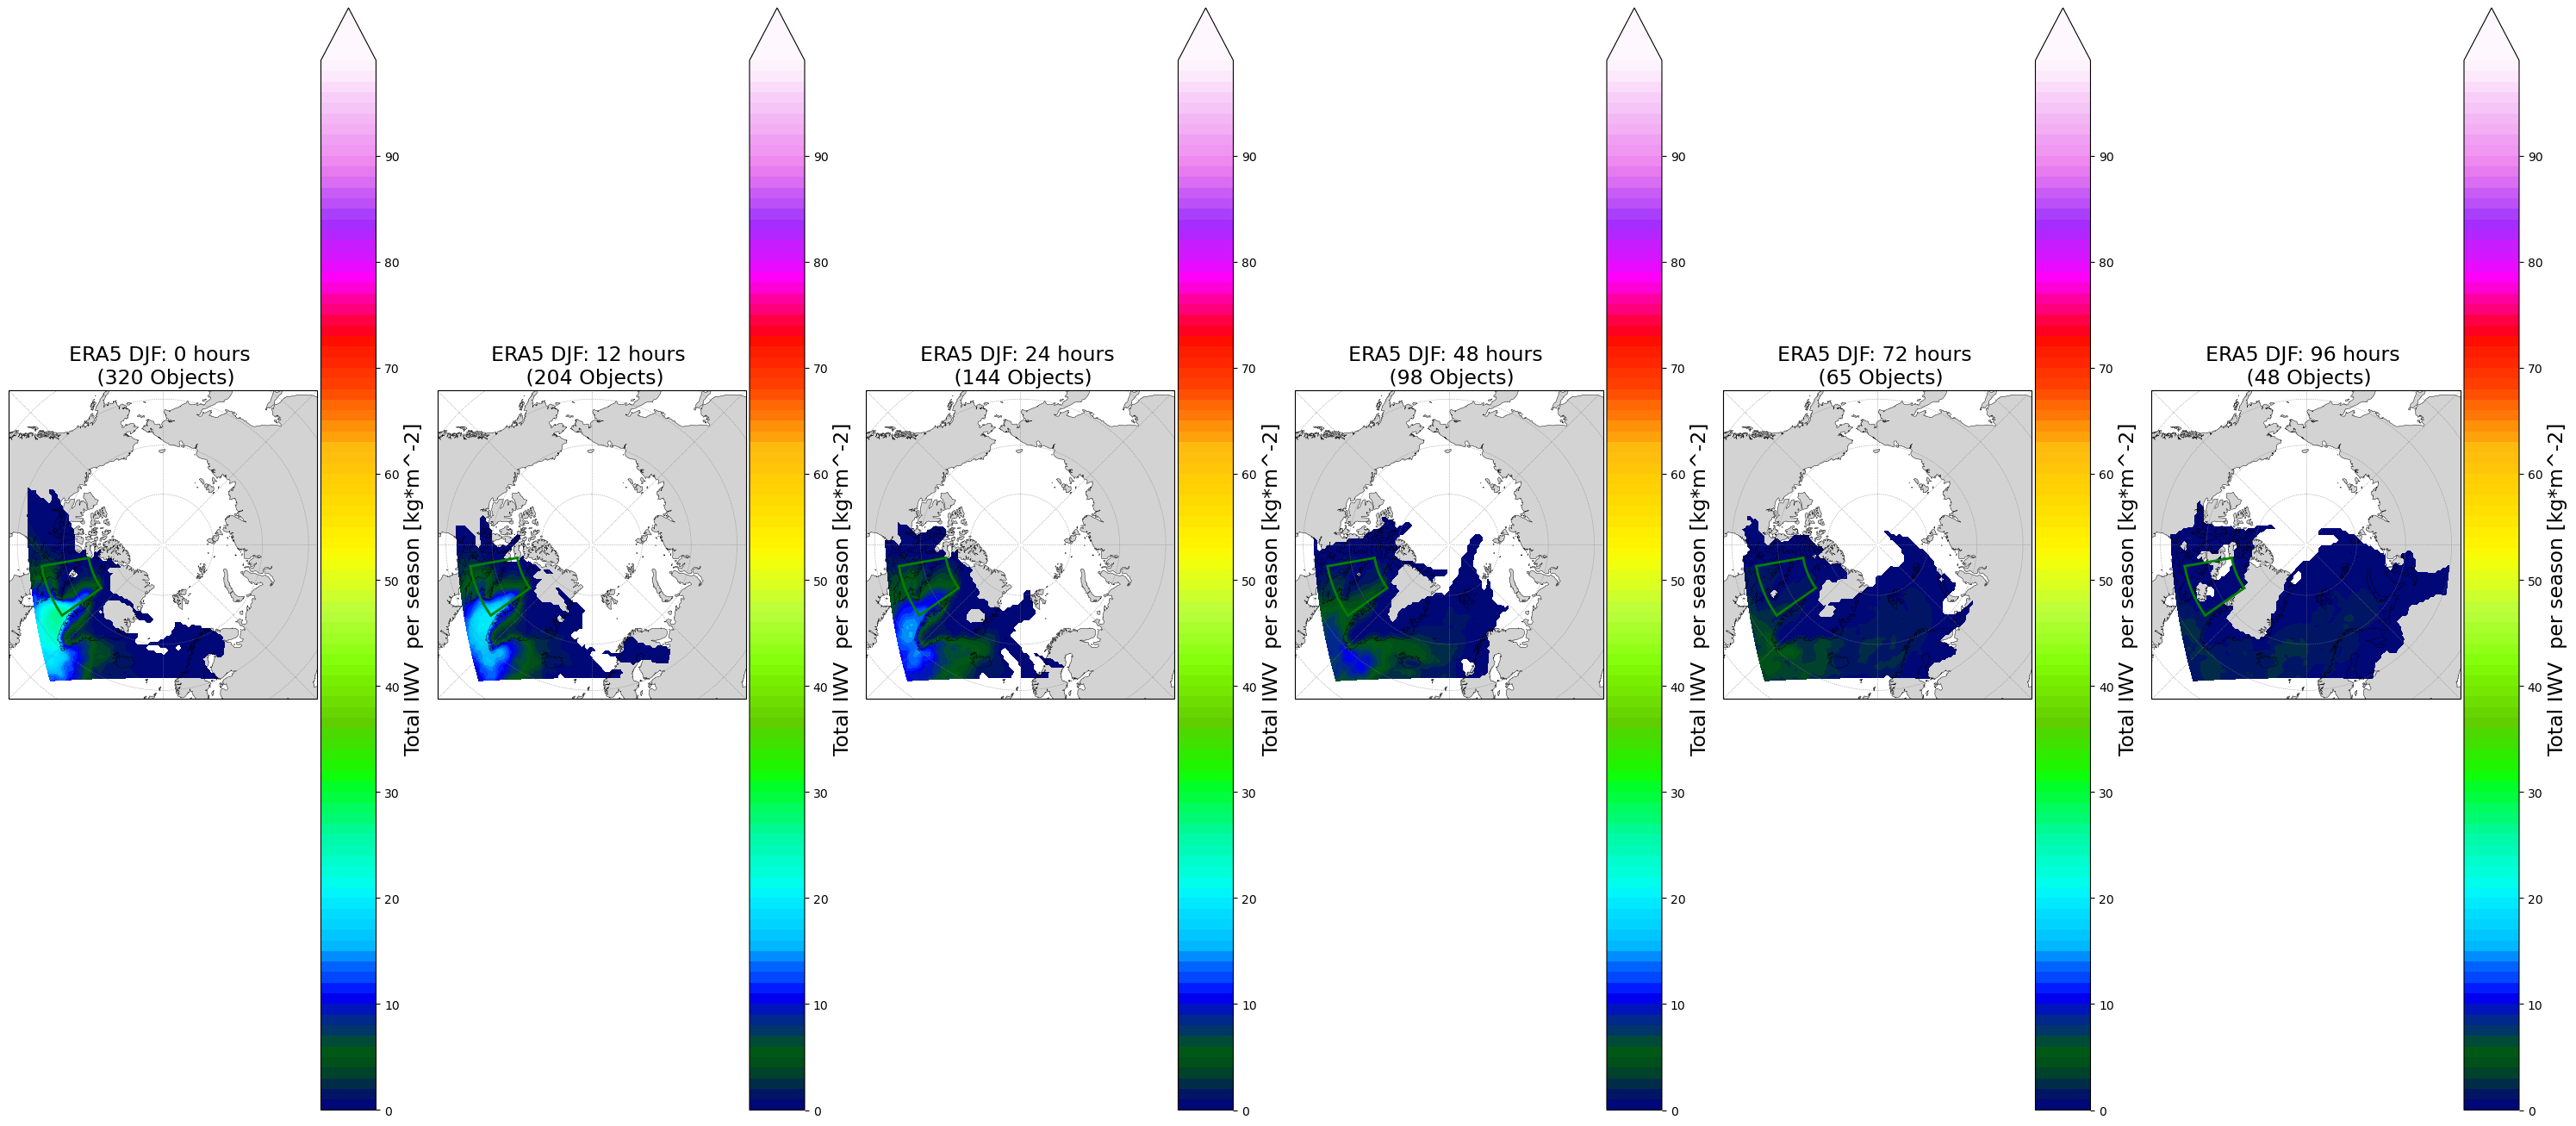

In [12]:
fig = plt.figure(figsize=(30,20))
levels=np.arange(0,100,5)
tsteps=[0,12,24,48,72,96]
subplts = (1,len(tsteps))
plot_idx = np.arange(0,len(tsteps)*1,len(tsteps))
font_size = 17
domain = Domains.BAFFIN_BAY.value

for  season_,i in zip([Season.DJF],plot_idx):
    k=0

    print (season_)
    
        
    
        
    IVTobjs_sel_ERA5 = IVT_objs_ERA5.sel_season(season_).sel_by_domain(domain,type_="anytime", domain_frac = 0.1, select_last_timesteps=True)
    for j,t in enumerate(tsteps):

        IVTobjs_sel_tstep = IVTobjs_sel_ERA5.seltimesteps(time_slice=slice(t,t+1))
        number_objs =IVTobjs_sel_tstep.count()


        lon,lat,z = calculate_variable_sum(IVTobjs_sel_tstep, attr="IWV")
    
        # normalize grid point counts to counts per season
        z= (z/num_years)*1.000001
        z[z<0.5] = np.nan
        plot_on_rotated_grid(lon,
                                  lat, 
                                  z, 
                                  fig=fig,
                                  index = i+j ,
                                  levels = levels,
                                   subplts=subplts,
                                  title=f'ERA5 {season_.name}: {tsteps[k]} hours \n ({number_objs} Objects)',
                                  #cbar_label = "Total IWV [kg*m^-2] transported by objects \n after passing region (per season)",
                                  cbar_label = "Total IWV  per season [kg*m^-2] ",

                                  plot_domains={domain : 'green'},
                                  cbar=True,
                             cmap="gist_ncar",
                                  font_size=font_size
                                    )

        k +=1
        
   
    
plt.tight_layout()

In [ ]:
fig = plt.figure(figsize=(30,20))
levels=np.arange(0,100,5)
tsteps=[0,12,24,48,72,96]
subplts = (1,len(tsteps))
plot_idx = np.arange(0,len(tsteps)*1,len(tsteps))
font_size = 17
domain = Domains.SIBERIA.value

for  season_,i in zip([Season.DJF],plot_idx):
    k=0

    print (season_)
    
        
    
        
    IVTobjs_sel_ERA5 = IVT_objs_ERA5.sel_season(season_).sel_by_domain(domain,type_="anytime", domain_frac = 0.1, select_last_timesteps=True)
    for j,t in enumerate(tsteps):

        IVTobjs_sel_tstep = IVTobjs_sel_ERA5.seltimesteps(time_slice=slice(t,t+1))
        number_objs =IVTobjs_sel_tstep.count()


        lon,lat,z = calculate_variable_sum(IVTobjs_sel_tstep, attr="IWV")
    
        # normalize grid point counts to counts per season
        z= (z/num_years)*1.000001
        z[z<0.01] = np.nan
        plot_on_rotated_grid(lon,
                                  lat, 
                                  z, 
                                  fig=fig,
                                  index = i+j ,
                                  levels = levels,
                                   subplts=subplts,
                                  title=f'ERA5 {season_.name}: {tsteps[k]} hours \n ({number_objs} Objects)',
                                  #cbar_label = "Total IWV [kg*m^-2] transported by objects \n after passing region (per season)",
                                  cbar_label = "Total IWV  per season [kg*m^-2] ",

                                  plot_domains={domain : 'green'},
                                  cbar=True,
                             cmap="gist_ncar",
                                  font_size=font_size
                                    )

        k +=1
        
   
    
plt.tight_layout()

In [ ]:
fig = plt.figure(figsize=(30,20))
levels=np.arange(0,100,5)
tsteps=[0,12,24,48,72,96]
subplts = (1,len(tsteps))
plot_idx = np.arange(0,len(tsteps)*1,len(tsteps))
font_size = 17
domain = Domains.NORTH_AMERICA.value

for  season_,i in zip([Season.DJF],plot_idx):
    k=0

    print (season_)
    
        
    
        
    IVTobjs_sel_ERA5 = IVT_objs_ERA5.sel_season(season_).sel_by_domain(domain,type_="anytime", domain_frac = 0.1, select_last_timesteps=True)
    for j,t in enumerate(tsteps):

        IVTobjs_sel_tstep = IVTobjs_sel_ERA5.seltimesteps(time_slice=slice(t,t+1))
        number_objs =IVTobjs_sel_tstep.count()


        lon,lat,z = calculate_variable_sum(IVTobjs_sel_tstep, attr="IWV")
    
        # normalize grid point counts to counts per season
        z= (z/num_years)*1.000001
        z[z<0.01] = np.nan
        plot_on_rotated_grid(lon,
                                  lat, 
                                  z, 
                                  fig=fig,
                                  index = i+j ,
                                  levels = levels,
                                   subplts=subplts,
                                  title=f'ERA5 {season_.name}: {tsteps[k]} hours \n ({number_objs} Objects)',
                                  #cbar_label = "Total IWV [kg*m^-2] transported by objects \n after passing region (per season)",
                                  cbar_label = "Total IWV  per season [kg*m^-2] ",

                                  plot_domains={domain : 'green'},
                                  cbar=True,
                             cmap="gist_ncar",
                                  font_size=font_size
                                    )

        k +=1
        
   
    
plt.tight_layout()